In [2]:
import tensorflow as tf

import keras
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Filter Visualization

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

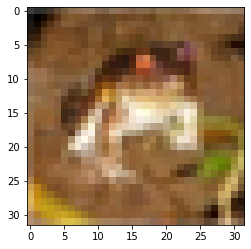

In [5]:
plt.imshow(x_train[0])

In [6]:
batchSize = 50
numClass = 10
epochs = 12

img_rows, img_cols = 32, 32

In [22]:
x_train[0].shape

(32, 32, 3)

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, numClass)
y_test = keras.utils.to_categorical(y_test, numClass)

In [11]:
model = keras.models.load_model('cifar/model/cifar_keras.h5')

In [12]:
model.layers

In [16]:
def predict(idx, verbose=False):
    img = x_test[idx]
    label = y_test[idx]

    predict = model.predict_proba(np.expand_dims(img, axis=0))
    if verbose:
        print(f'Index: {idx}')
        cnt = 0
        for i in predict[0]:
            print('[{}] {:.2%}'.format(cnt, i))
            cnt += 1
        print('Predicted: ', predict[0].argmax())
        print('Label: ', label.argmax())
        plt.imshow(np.reshape(img, [32, 32, 3]),interpolation='nearest', cmap='gray')
    return (predict[0].argmax(), label.argmax())

In [15]:
predict(0, True)

Index: 0
[0] 0.05%
[1] 0.06%
[2] 0.28%
[3] 78.95%
[4] 0.00%
[5] 17.15%
[6] 0.50%
[7] 0.78%
[8] 2.10%
[9] 0.13%
Predicted:  3
Label:  3


ValueError: cannot reshape array of size 3072 into shape (32,32)

In [17]:
feature_extractor = keras.Model(inputs=model.inputs, \
                                outputs=[layer.output for layer in model.layers[:-4]])

def get_hidden_layers(idx, _benchmark_=False):
    if _benchmark_:
        image = tf.convert_to_tensor(np.expand_dims(benchmark[idx], axis=0))
    else:
        image = tf.convert_to_tensor(np.expand_dims(x_test[idx], axis=0))
    features = feature_extractor(image)
    return features

In [18]:
import math

def plotNNFilter(feature):
    feature = K.eval(feature)
    filters = feature.shape[3]  # number of filters
    plt.figure(1, figsize=(20,20))
    n_columns = 5
    n_rows = math.ceil(filters / n_columns) + 1

    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(feature[0,:,:,i], interpolation='nearest', cmap='gray')

In [20]:
hiddens[4].shape

TensorShape([1, 16, 16, 20])

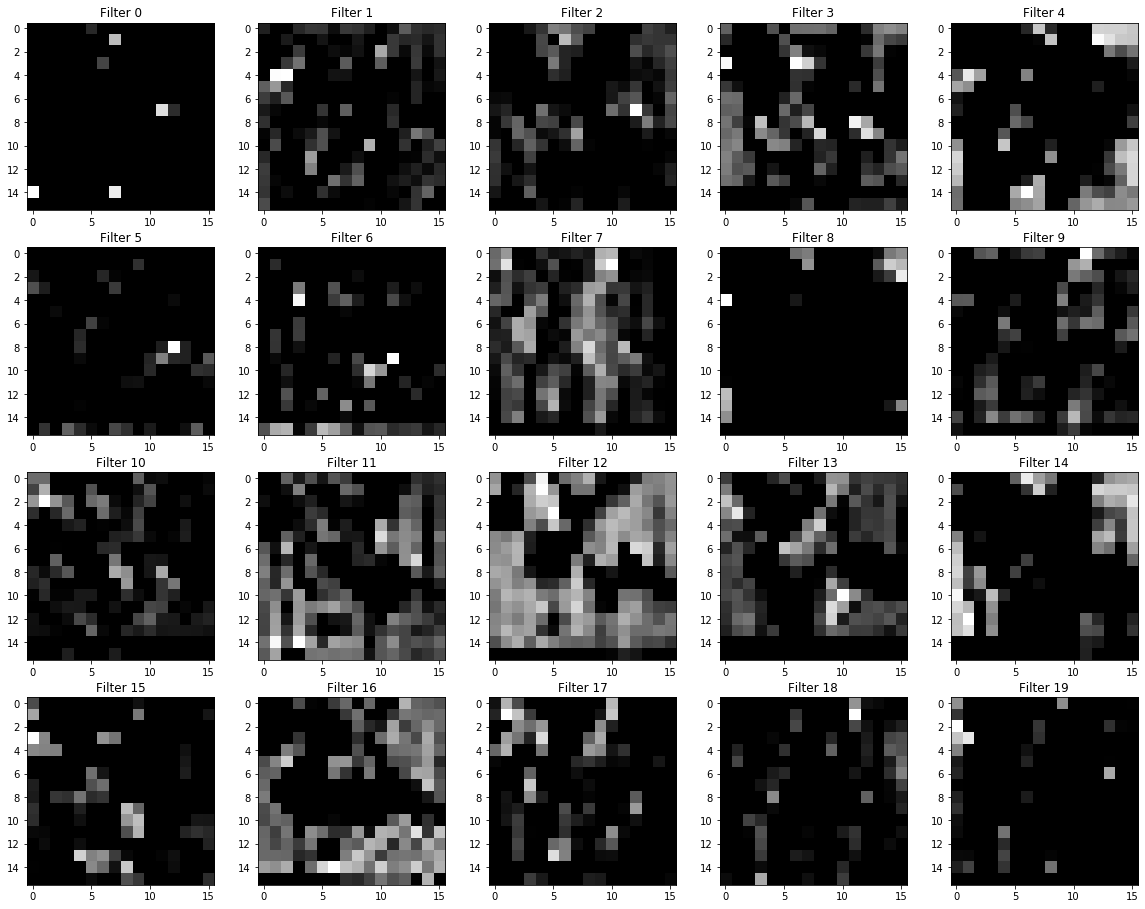

In [19]:
hiddens = get_hidden_layers(8)
plotNNFilter(hiddens[4])

In [25]:
### Create benchmarks
# Take average of all the train images for each label.

In [26]:
from collections import defaultdict

label_class = defaultdict(list)
for i in range(y_train.shape[0]):
    label_class[y_train[i].argmax()].append(i)

In [27]:
# list of x_train data(28, 28, 1) for each label in list
lst = []
for j in range(10):
    lst.append([x_train[i] for i in label_class[j]])

In [28]:
# list of benchmarks for each label
benchmark = []
for i in range(10):
    tmp = []
    for j in range(len(lst[i])):
        tmp.append(lst[i][j])
    avg = np.mean(np.array(tmp), axis=0)
    avg = avg/avg.max()
    benchmark.append(avg)

In [31]:
choice = []
with open('dropdown.txt', 'r') as f:
    for l in f:
        choice.append(l.strip())

In [ ]:
lst[8][0].shape
np.mean(np.array(tmp), axis=0)

In [ ]:
# compare and contrast by tensor subtraction
def plotCompare(feature1, feature2):
    if feature1.shape != feature2.shape:
        print("Shapes don't match")
        return

    feature1 = K.eval(feature1)
    feature2 = K.eval(feature2)
    filters = feature1.shape[3]  # number of filters
    #plt.figure(1, figsize=(20,20))
    n_columns = 5
    n_rows = math.ceil(filters / n_columns) + 1

    for i in range(filters):
        gap = tf.math.abs(tf.math.subtract(feature1[0,:,:,i], feature2[0,:,:,i]))
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(gap, interpolation='nearest', cmap='gray')

In [ ]:
### Interactive Widget

In [30]:
import ipywidgets as widgets
from ipywidgets import interact_manual
import seaborn as sns

interactive(children=(Dropdown(description='Image', options=('1) predicted: 3, label: 2', '4) predicted: 9, la…

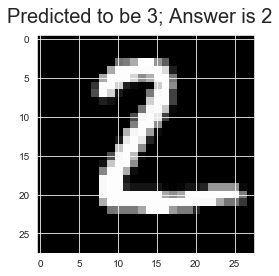

<Figure size 3600x1440 with 0 Axes>

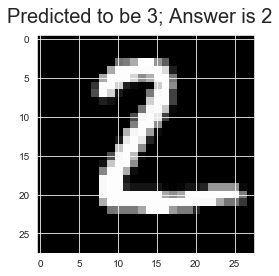

<Figure size 3600x1440 with 0 Axes>

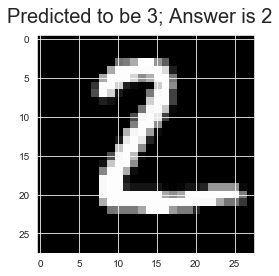

<Figure size 3600x1440 with 0 Axes>

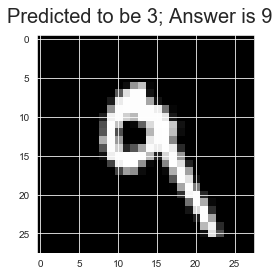

<Figure size 3600x1440 with 0 Axes>

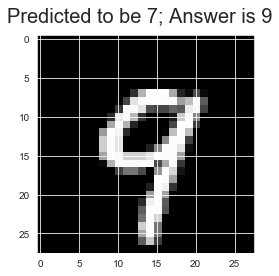

<Figure size 3600x1440 with 0 Axes>

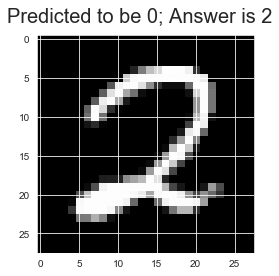

<Figure size 3600x1440 with 0 Axes>

In [35]:
@interact_manual
def filterViz(Image = choice, Layer = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    i = Image.split(')')
    idx = int(i[0])
    i = Image.split(',')
    predicted = int(i[0][-1])
    answer = int(i[1][-1])
    
    hiddens = get_hidden_layers(idx)    
    print(len(hiddens))
#     hiddens_p = get_hidden_layers(predicted, True)
#     hiddens_a = get_hidden_layers(answer, True)
    
    %matplotlib inline
    sns.set_style('darkgrid')
    
    fig1 = plt.figure(1)
    fig1.suptitle(f'Predicted to be {predicted}; Answer is {answer}', fontsize=20)
    predict(idx, True)
    
    fig2 = plt.figure(2, figsize=(50,20))
    fig2.suptitle(f'Hidden layer{Layer} of the image', fontsize=50)
    plotNNFilter(hiddens[Layer])

#     fig3 = plt.figure(3, figsize=(50,20))
#     fig3.suptitle(f'Hidden layer{Layer} of benchmark {predicted}', fontsize=50)
#     plotNNFilter(hiddens_p[Layer])
    
#     fig4 = plt.figure(4, figsize=(50,20))
#     fig4.suptitle(f'Hidden layer{Layer} of benchmark {answer}', fontsize=50)
#     plotNNFilter(hiddens_a[Layer])
    
#     fig5 = plt.figure(5, figsize=(50,20))
#     fig5.suptitle(f'Compare n Contrast with benchmark {predicted}', fontsize=50)
#     plotCompare(hiddens_p[Layer], hiddens[Layer])

#     fig6 = plt.figure(6, figsize=(50,20))
#     fig6.suptitle(f'Compare n Contrast with benchmark {answer}', fontsize=50)
#     plotCompare(hiddens_a[Layer], hiddens[Layer])
    
    plt.show()